# Case Study - Wine Quality Prediction
Our objective is to build a model to test the wine quality using the features in the wine-quality dataset from the UC Irvine Machine Learning Repository. The wine dataset is a classic and very easy multi-class classification dataset.

Number of Instances: red wine - 1599; white wine - 4898.<br>

## Dataset:
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality
<br>

### Attribute information:
Input variables (based on physicochemical tests):
    - fixed acidity (tartaric acid - g / dm^3)
    - volatile acidity (acetic acid - g / dm^3)
    - citric acid (g / dm^3)
    - residual sugar (g / dm^3)
    - chlorides (sodium chloride - g / dm^3
    - free sulfur dioxide (mg / dm^3)
    - total sulfur dioxide (mg / dm^3)
    - density (g / cm^3)
    - pH
    - sulphates (potassium sulphate - g / dm3)
    - alcohol (% by volume)

Output variable (based on sensory data): 
    - quality (score between 0 and 10)
      In the dataset , available classes of "quality" attribute are : 3,4,5,6,7,8

In [1]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb

In [2]:
# read the dataset to a dataframe

wine_df = pd.read_csv("winequality-red.csv",sep=";")
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine_df.shape

(1599, 12)

In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [6]:
#check missing values in the attributes columns
wine_df.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

## Univariate analysis: check individual attributes for its distribution 

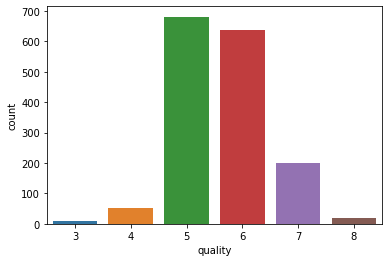

In [7]:
# target attribute value counts
sns.countplot(wine_df['quality'])

as we can see , the quality values 5 and 6 have more number of instances among  3,4,5,6,7,8 quality values are present in the dataset.

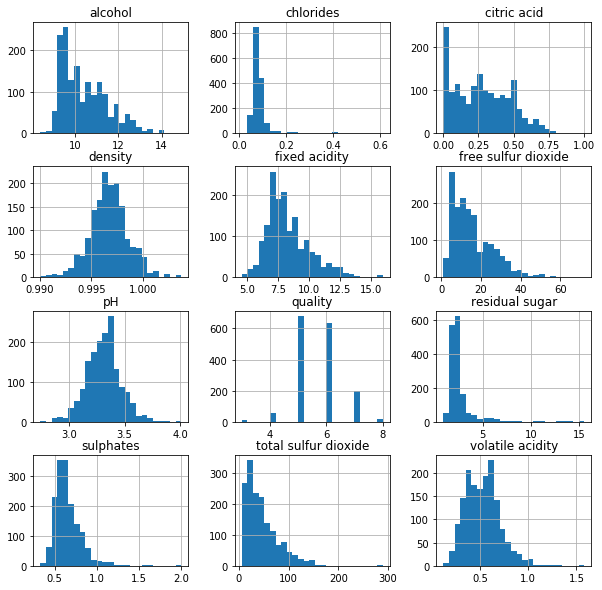

In [8]:
wine_df.hist(bins=25,figsize=(10,10))
plt.show()

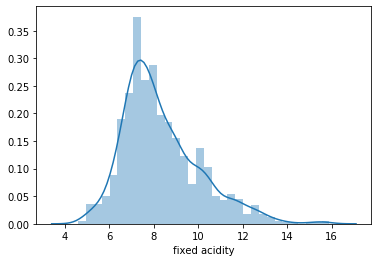

In [9]:
#check the distribution of fixed acidity attribute
sns.distplot(wine_df['fixed acidity'])

The attribute 'fixed acidity' has a little rightend tail, so the distribution is skewed

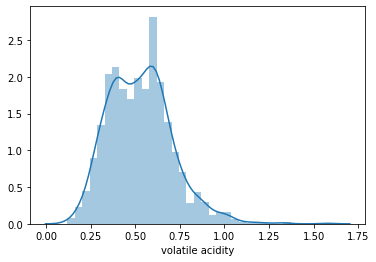

In [10]:
#volatile acidity 
sns.distplot(wine_df['volatile acidity'])

this attribute distribution is showing multiple peaks and skewed towards right

## Pair plot analysis

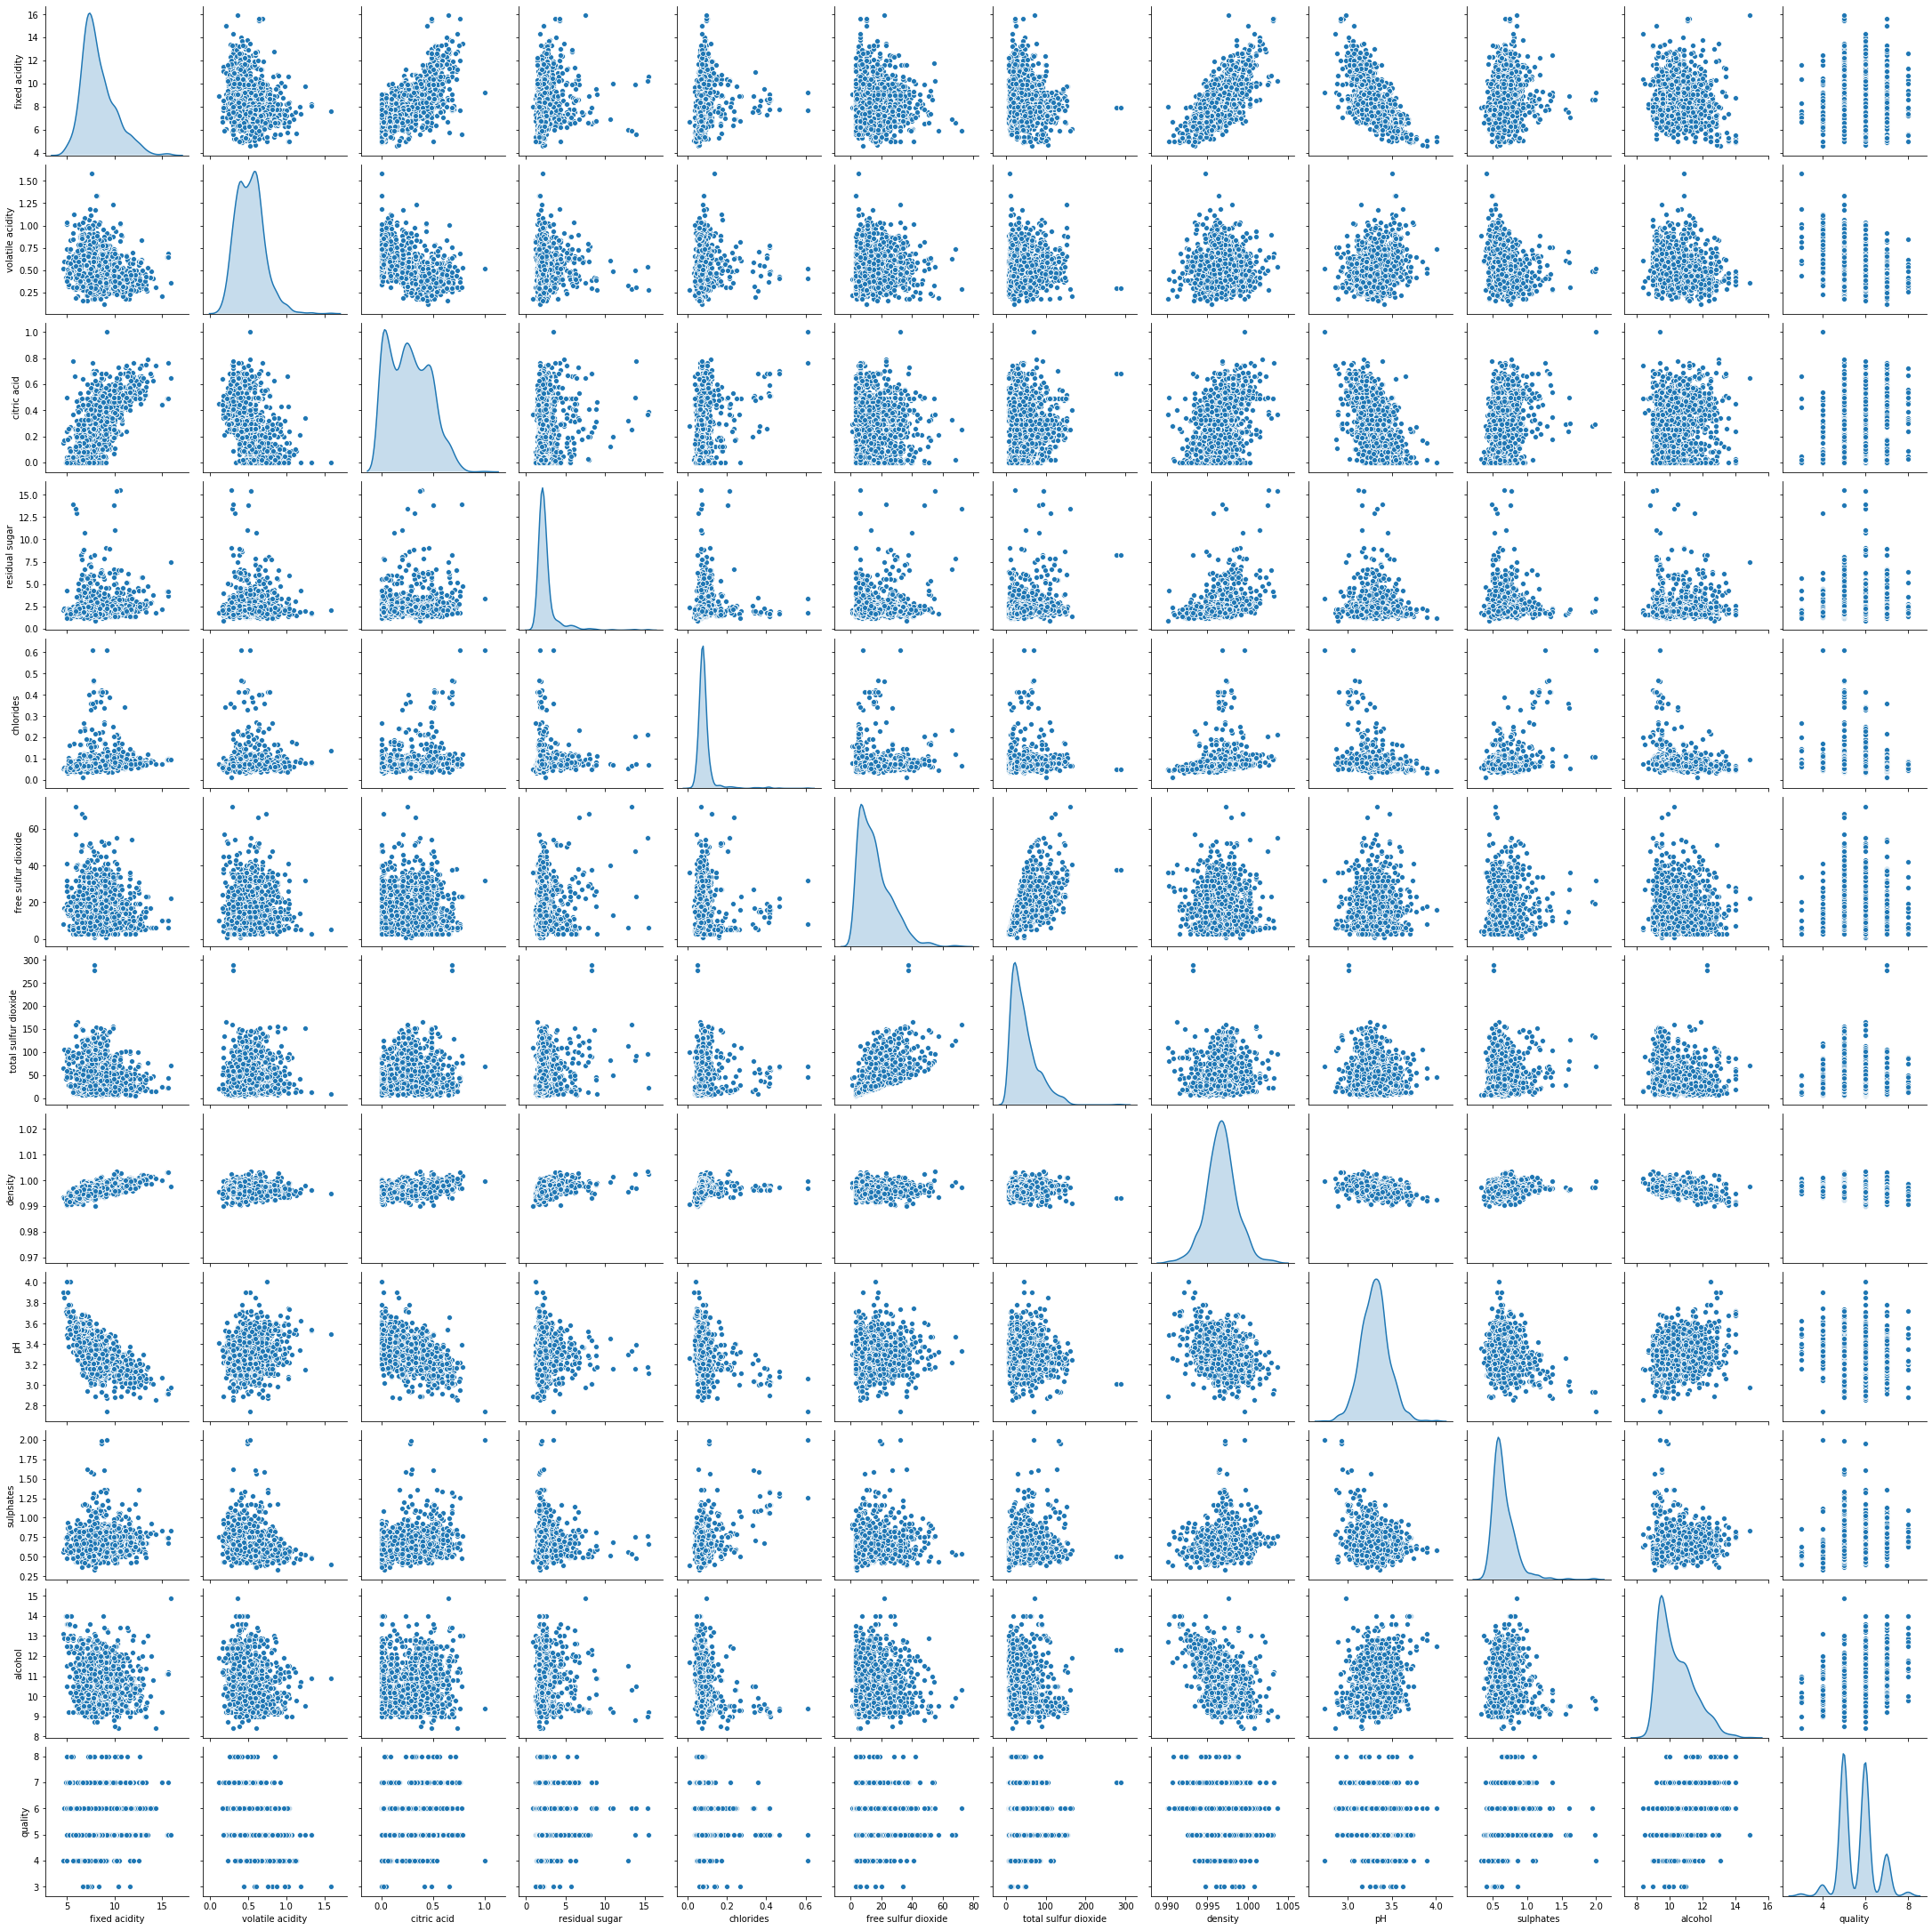

In [11]:
sns.pairplot(wine_df,diag_kind='kde')

In the distribution for the attributes, we can see most of them are skewed,It ccan be because of the unbalance in the data and there are multiple peaks in some of the attribute distribution, this can be due mixing up of gaussians. density attribute is looking as if it has a normal distribution.<br> 
if we see correlation between the attributes, most of them have a cloud like structure means less correlation between the attributes. But if we see 'citric acid' and 'fixed acidity', there is a positive correlation between those attributes. Also between 'pH'  has negative correlation with 'fixed acidity' and 'citric acid' attributes.ation between 'free sulfur dioxide' and 'total sulfur dioxide'. There is some sigificance correlation between 'desity' and 'fixed acidity'

### Correlation - Heatmap

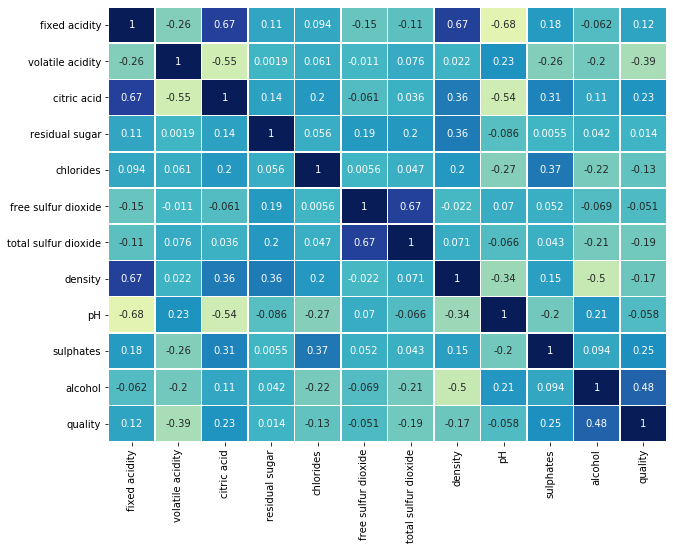

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(wine_df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

In [13]:
for a in range(len(wine_df.corr().columns)):
    for b in range(a):
        if abs(wine_df.corr().iloc[a,b]) >0.7:
            name = wine_df.corr().columns[a]
            print(name)
    

### Check for Outliers

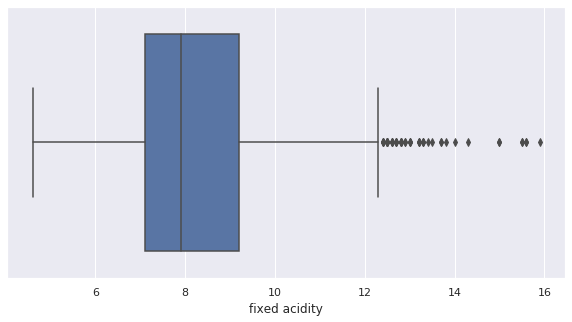

In [14]:
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(wine_df['fixed acidity'])

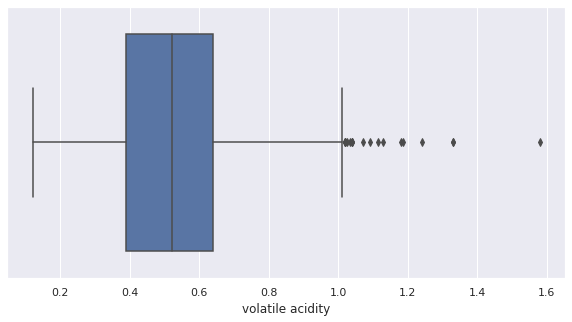

In [15]:
sns.boxplot(wine_df['volatile acidity'])

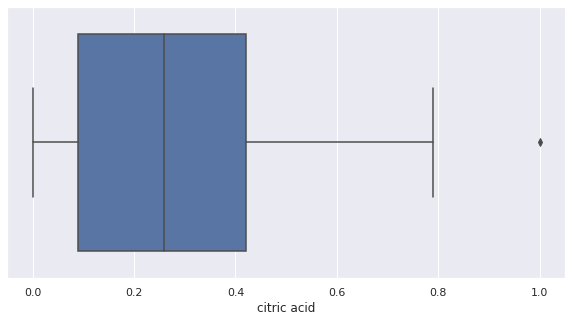

In [16]:
sns.boxplot(wine_df['citric acid'])

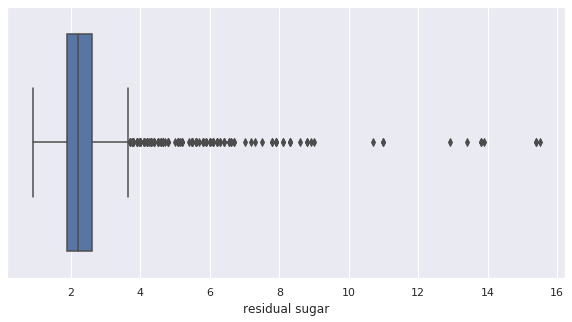

In [17]:
sns.boxplot(wine_df['residual sugar'])

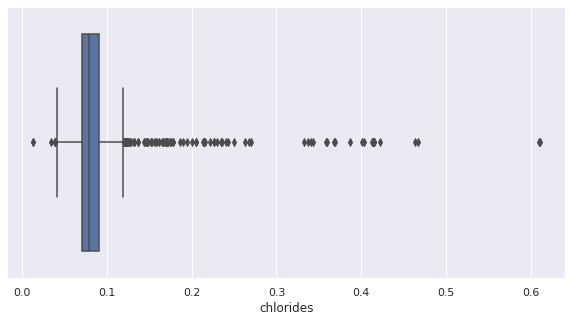

In [18]:
sns.boxplot(wine_df['chlorides'])

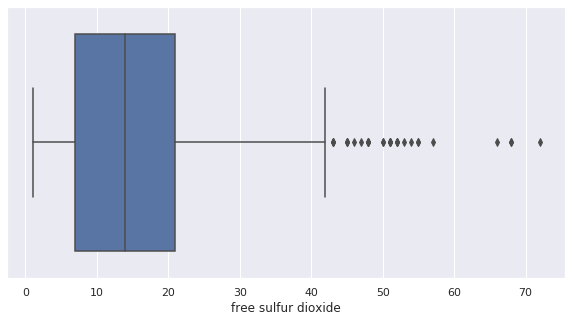

In [19]:
sns.boxplot(wine_df['free sulfur dioxide'])

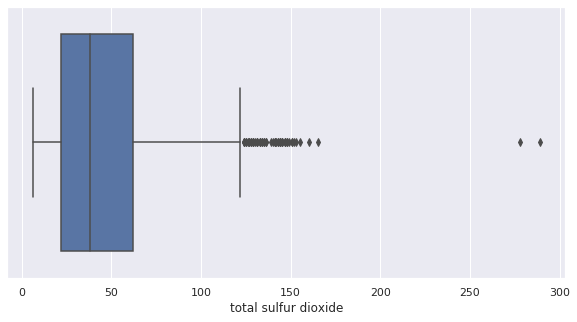

In [20]:
sns.boxplot(wine_df['total sulfur dioxide'])

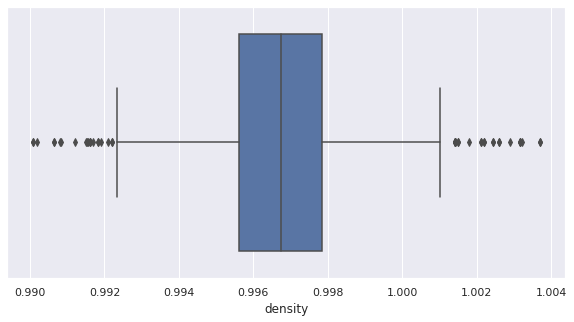

In [21]:
sns.boxplot(wine_df['density'])

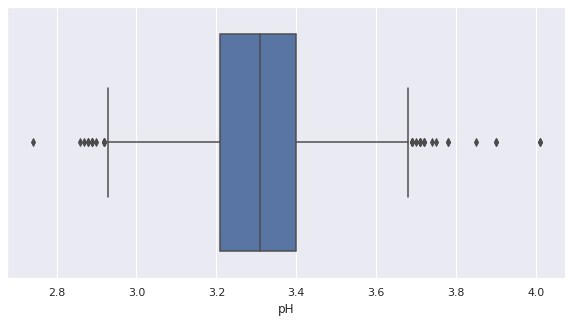

In [22]:
sns.boxplot(wine_df['pH'])

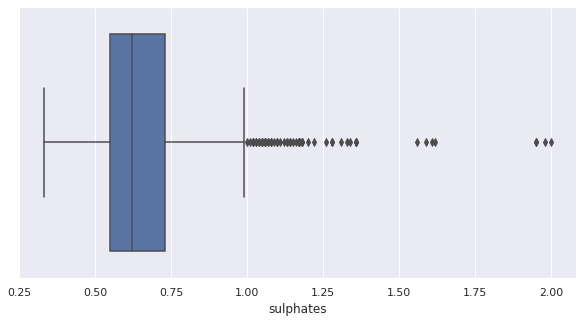

In [23]:
sns.boxplot(wine_df['sulphates'])

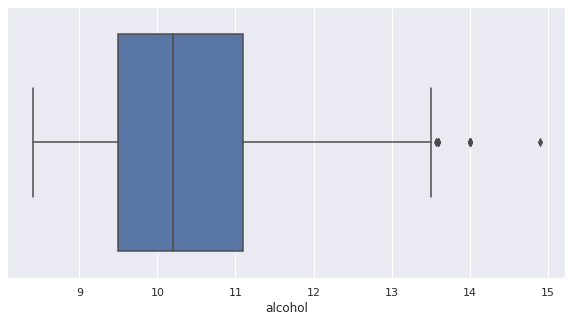

In [24]:
sns.boxplot(wine_df['alcohol'])

There are outliers for every feature. First lets model it with the outliers, depends on the performace , we can handle the outliers if needed. Normally outliers will have a negligible effect on decision tree model and on ensemble methods.

In [25]:
#check the target classes
wine_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

We have very less instances for class 3, 4. Since there is no much difference between these values we can combine them with the class 5. Also , class 8 has very less samples, so lets mix it with class 7. Then we can have a more balanced output class.

In [26]:
wine_df['quality'] = wine_df['quality'].replace(3,5)
wine_df['quality'] = wine_df['quality'].replace(4,5)
wine_df['quality'] = wine_df['quality'].replace(8,7)

wine_df['quality'].value_counts()

5    744
6    638
7    217
Name: quality, dtype: int64

The above classes look pretty much balanced than before.

## Features and target attribute

In [27]:
X = wine_df.iloc[:,0:11]
y = wine_df['quality']
print(X.shape,y.shape)
print(X.columns)


(1599, 11) (1599,)
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


## Splitting data for training and validation

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1119, 11), (480, 11), (1119,), (480,))

## Standardize the data

In [29]:
scaled = StandardScaler().fit(X_train)
X_train_std = scaled.transform(X_train)
X_test_std = scaled.transform(X_test)

### Basic DecisionTreeClassifier

In [30]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [31]:
y_pred = tree_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.6520833333333333

In [32]:
y_pred_train= tree_clf.predict(X_train)
accuracy_score(y_train,y_pred_train)

1.0

### Hyperparameter tuned DecisionTreeClassifier 

In [33]:
#using GridSearchCV to find the optimum hyperparameters

params = {'max_depth':[5,6,7,8], 'min_samples_split':[5,10,20,30],'max_leaf_nodes': list(range(10,50))}
tree_GridCV = GridSearchCV(DecisionTreeClassifier(random_state=1),params,verbose=1,cv=3)
tree_GridCV.fit(X_train,y_train)

Fitting 3 folds for each of 640 candidates, totalling 1920 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [5, 6, 7, 8],
                         'max_leaf_nodes': [10, 11, 12, 13, 14, 15, 16, 17, 18,
                                            19, 20, 21, 22, 23, 24, 25, 26, 27,
                                            28, 29, 30, 31, 32, 33, 34, 35, 36,
                                            37, 38, 39, ...],
                         'min_samples_split': [5, 10, 20, 30]},
             verbose=1)

In [34]:
tree_GridCV.best_params_

{'max_depth': 6, 'max_leaf_nodes': 27, 'min_samples_split': 5}

In [35]:
y_pred1 = tree_GridCV.predict(X_test)
accuracy_score(y_test,y_pred1)

0.61875

In [36]:
y_pred1_train= tree_GridCV.predict(X_train)
acc_dt = accuracy_score(y_train,y_pred1_train)
acc_dt

0.7265415549597856

The performance is very poor;atleast now the model is not overfitting the training data.

## RandomForestClassifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_std,y_train)

RandomForestClassifier()

In [38]:
y_test_pred = rfc.predict(X_test_std)
accuracy_score(y_test,y_test_pred)

0.7125

In [39]:
y_train_pred = rfc.predict(X_train_std)
accuracy_score(y_train,y_train_pred)

1.0

Overfitted to training data

In [40]:
for name,score in zip(wine_df.columns,rfc.feature_importances_):
    print ('{}\t: {}'.format(name,score))


fixed acidity	: 0.06895418258378061
volatile acidity	: 0.10552044330917061
citric acid	: 0.07380510559621814
residual sugar	: 0.06467674636178289
chlorides	: 0.08016949816064142
free sulfur dioxide	: 0.06402303311559038
total sulfur dioxide	: 0.10194843537623155
density	: 0.08541863349414477
pH	: 0.0766296045162269
sulphates	: 0.12634722390397568
alcohol	: 0.152507093582237


###  Tuning RandomForestClassifier

In [41]:
#using GridSearchCV
params = {'n_estimators':[500,750],'max_depth':[6,7,8],'max_leaf_nodes': list(range(20,50))}
rfc_gridCV = GridSearchCV(RandomForestClassifier(random_state=1),params,verbose=1,cv=3)
rfc_gridCV.fit(X_train_std,y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [6, 7, 8],
                         'max_leaf_nodes': [20, 21, 22, 23, 24, 25, 26, 27, 28,
                                            29, 30, 31, 32, 33, 34, 35, 36, 37,
                                            38, 39, 40, 41, 42, 43, 44, 45, 46,
                                            47, 48, 49],
                         'n_estimators': [500, 750]},
             verbose=1)

In [42]:
rfc_gridCV.best_params_

{'max_depth': 7, 'max_leaf_nodes': 47, 'n_estimators': 750}

In [43]:
y_test_pred_CV = rfc_gridCV.predict(X_test_std)
acc_rfc= accuracy_score(y_test,y_test_pred_CV)
acc_rfc

0.6770833333333334

In [44]:
y_train_pred_CV = rfc_gridCV.predict(X_train_std)
accuracy_score(y_train,y_train_pred_CV)

0.8302055406613047

## AdaBoost
Boosting is an Ensemble method that can train predictors sequentially, each trying to correct its predecessor.
Adaboost classifier algorithm first trains a base classifier and uses it to make predictions on the training set. Then increasses the realtive weight of misclassified training instances. then it trains the second classifier using updated weights and again make predictions, update the instances weights and so on

In [45]:
ada_clf = AdaBoostClassifier(n_estimators=500,random_state=1)
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=500, random_state=1)

In [46]:
ada_y_pred = ada_clf.predict(X_test)
acc_ada= accuracy_score(y_test,ada_y_pred)
acc_ada

0.6479166666666667

The above accuracy 

## Gradient Boosting

In [47]:
gb_clf = GradientBoostingClassifier(n_estimators=500,random_state=1)
gb_clf.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=500, random_state=1)

In [48]:
gb_y_pred= gb_clf.predict(X_test)
acc_grd = accuracy_score(y_test,gb_y_pred)
acc_grd

0.7166666666666667

## XGBoost

In [49]:
xgb_clf= xgb.XGBClassifier(n_estimators=500,random_state=1)
xgb_clf.fit(X_train,y_train)

/home/paul/.virtualenvs/aiml/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:50:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
xgb_y_pred= xgb_clf.predict(X_test)
acc_xgb = accuracy_score(y_test,xgb_y_pred)
acc_xgb

0.7125

In [51]:
result_df= pd.DataFrame({'Algorithms': ['DecisionTree','RandomForest','AdaBoost','GradientBoost','XGBoost'],
                         'Accuracy_Score' : [acc_dt,acc_rfc,acc_ada,acc_grd,acc_xgb]
                        })
result_df

,Algorithms,Accuracy_Score
0,DecisionTree,0.726542
1,RandomForest,0.677083
2,AdaBoost,0.647917
3,GradientBoost,0.716667
4,XGBoost,0.712500


Gradient Boosting Classifier algorithm is giving the most accuracy among all ensemble algorithms.